# **Import Library**

In [100]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading Dataset**


In [112]:
from google.colab import files

# Mengupload file UMR_PROPINSI_2019-2020.csv
uploaded = files.upload()


Saving financial_data_indonesia.csv to financial_data_indonesia.csv


In [113]:
df = pd.read_csv("financial_data_indonesia.csv")

# Sample preview of the data
df.head()


,userID,age,location,month,income,food_expenses,transport_expenses,housing_cost,water_bill,electricity_bill,internet_cost,debt,savings,financial_status
0,U000001,55,LAMPUNG,2023-01-01,2432002,852238,359178,608000.5,257892,154886,121600.10,0.0,78207.40,Tidak Sehat
1,U000002,27,NUSA TENGGARA BARAT,2023-04-01,2586423,795451,141090,0.0,50769,421879,129321.15,0.0,1047912.85,Sehat
2,U000003,37,JAWA TIMUR,2023-03-01,1768777,701204,358795,0.0,288042,256730,88438.85,0.0,75567.15,Tidak Sehat
3,U000004,32,BENGKULU,2023-11-01,2213604,572701,184654,0.0,117435,419030,110680.20,442720.8,366383.00,Tidak Sehat
4,U000005,53,SUMATERA SELATAN,2023-10-01,3043111,1098114,356840,0.0,191699,798361,152155.55,0.0,445941.45,Tidak Sehat


## **EDA**

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userID              100000 non-null  object 
 1   age                 100000 non-null  int64  
 2   location            100000 non-null  object 
 3   month               100000 non-null  object 
 4   income              100000 non-null  int64  
 5   food_expenses       100000 non-null  int64  
 6   transport_expenses  100000 non-null  int64  
 7   housing_cost        100000 non-null  float64
 8   water_bill          100000 non-null  int64  
 9   electricity_bill    100000 non-null  int64  
 10  internet_cost       100000 non-null  float64
 11  debt                100000 non-null  float64
 12  savings             100000 non-null  float64
 13  financial_status    100000 non-null  object 
dtypes: float64(4), int64(6), object(4)
memory usage: 10.7+ MB


In [115]:
df.describe()

,age,income,food_expenses,transport_expenses,housing_cost,water_bill,electricity_bill,internet_cost,debt,savings
count,100000.000000,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,100000.00000,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05
mean,37.985820,2.731730e+06,9.563182e+05,299996.978230,2.045723e+05,175014.59200,5.960692e+05,135219.466364,3.275834e+05,2.547951e+05
std,12.403506,5.918991e+05,3.186504e+05,115442.902697,3.225521e+05,72171.97558,3.174880e+05,32464.242040,2.827674e+05,3.726480e+05
min,17.000000,1.568456e+06,3.229370e+05,100001.000000,0.000000e+00,50001.00000,1.000130e+05,0.000000,0.000000e+00,0.000000e+00
25%,27.000000,2.399699e+06,7.110025e+05,200024.250000,0.000000e+00,112356.50000,3.337178e+05,118893.400000,0.000000e+00,0.000000e+00
50%,38.000000,2.721530e+06,9.196100e+05,300313.500000,0.000000e+00,175191.50000,5.680385e+05,136076.500000,4.367766e+05,2.287012e+04
75%,49.000000,3.061680e+06,1.165757e+06,400249.000000,5.459708e+05,237419.00000,8.243235e+05,152657.887500,5.754898e+05,4.228533e+05
max,59.000000,5.558347e+06,2.725273e+06,499996.000000,1.385459e+06,299999.00000,2.158914e+06,277917.350000,1.110936e+06,3.388787e+06


In [116]:
df.isnull().all()

,0
userID,False
age,False
location,False
month,False
income,False
food_expenses,False
transport_expenses,False
housing_cost,False
water_bill,False
electricity_bill,False


# **Preparing Data**

**Encoding Category Column**

In [117]:
from sklearn.preprocessing import LabelEncoder

# Create separate LabelEncoder objects for 'location' and 'financial_status'
label_encoder_location = LabelEncoder()
label_encoder_financial_status = LabelEncoder()

# Encode the 'location' column using the label encoder
df['location'] = label_encoder_location.fit_transform(df['location'])

# Encode the 'financial_status' column using the label encoder
df['financial_status'] = label_encoder_financial_status.fit_transform(df['financial_status'])

# Display the encoded class labels for 'location' and 'financial_status'
print("Classes for 'location':", label_encoder_location.classes_)
print("Classes for 'financial_status':", label_encoder_financial_status.classes_)

# Display the first few rows of the dataframe after encoding
print(df.head())

Classes for 'location': ['ACEH' 'BALI' 'BANTEN' 'BENGKULU' 'DI YOGYAKARTA' 'DKI JAKARTA'
 'GORONTALO' 'JAMBI' 'JAWA BARAT' 'JAWA TENGAH' 'JAWA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN SELATAN' 'KALIMANTAN TENGAH'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'KEP. BANGKA BELITUNG' 'KEP. RIAU'
 'LAMPUNG' 'MALUKU' 'MALUKU UTARA' 'NUSA TENGGARA BARAT'
 'NUSA TENGGARA TIMUR' 'PAPUA' 'PAPUA BARAT' 'RIAU' 'SULAWESI BARAT'
 'SULAWESI SELATAN' 'SULAWESI TENGAH' 'SULAWESI TENGGARA' 'SULAWESI UTARA'
 'SUMATERA BARAT' 'SUMATERA SELATAN' 'SUMATERA UTARA']
Classes for 'financial_status': ['Kurang Sehat' 'Sehat' 'Tidak Sehat']
    userID  age  location       month   income  food_expenses  \
0  U000001   55        18  2023-01-01  2432002         852238   
1  U000002   27        21  2023-04-01  2586423         795451   
2  U000003   37        10  2023-03-01  1768777         701204   
3  U000004   32         3  2023-11-01  2213604         572701   
4  U000005   53        32  2023-10-01  3043111        1098114  

**Split Data**

In [118]:
# split data
from sklearn.model_selection import train_test_split
features = ['location', 'age', 'income', 'food_expenses', 'transport_expenses', 'housing_cost',
                     'water_bill', 'electricity_bill', 'internet_cost', 'debt', 'savings']

X = df[features]
y = df['financial_status']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Scaling Some Column**

In [119]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler for feature scaling
scaler = StandardScaler()

# List of feature names to be scaled
features_to_scale = ['income', 'food_expenses', 'transport_expenses',
                     'housing_cost', 'water_bill', 'electricity_bill',
                     'internet_cost', 'debt', 'savings']

# Apply scaling to the selected features in the training set
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Apply the same scaling to the selected features in the validation set
X_val[features_to_scale] = scaler.transform(X_val[features_to_scale])

# Apply the same scaling to the selected features in the test set
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

# Display the first few rows of the scaled training data
print(X_train.head())

       location  age    income  food_expenses  transport_expenses  \
75220        25   48  0.265696       0.385694           -0.280799   
48955        33   49 -0.392080      -0.269172           -1.215378   
44966        32   38  0.526931       1.721745           -0.975924   
13568        19   53  0.704600       1.210613           -0.215290   
92727        23   39  0.858739      -0.384911           -0.378149   

       housing_cost  water_bill  electricity_bill  internet_cost      debt  \
75220     -0.632483   -0.180939          0.758548       0.284318  0.885092   
48955     -0.632483    0.823768         -0.828634      -0.316024  0.609755   
44966     -0.632483    0.283979         -0.238799       0.522744 -1.158718   
13568     -0.632483   -1.135847         -1.326256       0.684899  1.068813   
92727     -0.632483    0.843394         -0.855678       0.825580  1.133334   

        savings  
75220 -0.683389  
48955  0.057564  
44966  0.610492  
13568  0.590502  
92727  1.401053  


In [120]:
# Cek distribusi kelas di y
print(y.value_counts())

# Cek distribusi kelas di y_train
print(y_train.value_counts())


financial_status
2    76636
1    14790
0     8574
Name: count, dtype: int64
financial_status
2    61193
1    11893
0     6914
Name: count, dtype: int64


**Oversampling**

In [121]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler to handle class imbalance by oversampling the minority class
oversample = RandomOverSampler(random_state=42)

# Apply oversampling to the training data (X_train, y_train)
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)

# Update X_train and y_train with the oversampled data
X_train, y_train = X_train_oversampled, y_train_oversampled

# Check the class distribution in y_train after applying oversampling
print(pd.Series(y_train).value_counts())

financial_status
2    61193
0    61193
1    61193
Name: count, dtype: int64


# **Modelling**

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback to stop training when the validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Number of epochs with no improvement before stopping
    restore_best_weights=True,  # Restore the weights from the best epoch
)

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        # First hidden layer with L2 regularization and ReLU activation
        Dense(64, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.001)),
        Dropout(0.2),  # Dropout layer to prevent overfitting

        # Second hidden layer with L2 regularization and ReLU activation
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),  # Dropout layer to prevent overfitting

        # Third hidden layer with L2 regularization and ReLU activation
        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),  # Dropout layer to prevent overfitting

        # Output layer with 3 neurons for multi-class classification
        Dense(3, activation='linear')
    ])
    return model

# Function to compile and train the model
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
    # Define loss function for multi-class classification
    loss_function = SparseCategoricalCrossentropy(from_logits=True)

    # Compile the model with Adam optimizer and sparse categorical cross-entropy loss
    model.compile(optimizer=Adam(learning_rate=0.00001),
                  loss=loss_function,
                  metrics=['accuracy'])

    # Train the model with early stopping to prevent overfitting
    history = model.fit(X_train, y_train,
                        epochs=epochs,  # Number of epochs to train
                        batch_size=batch_size,  # Batch size
                        validation_data=(X_val, y_val),  # Validation data to evaluate the model
                        callbacks=[early_stopping])  # Early stopping callback
    return history

# Get the input shape based on training data
input_shape = X_train.shape[1]

# Build the model
model = build_model(input_shape)

# Train the model with the training and validation data
history = train_model(model, X_train, y_train, X_val, y_val)

# Evaluate the trained model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save the trained model in two formats for later use
model.save("categorizing_financial_health_model.h5")
model.save('categorizing_financial_health_model.keras')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5737/5737 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.3288 - loss: 2.3065 - val_accuracy: 0.2653 - val_loss: 1.1666
Epoch 2/50
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3307 - loss: 1.2670 - val_accuracy: 0.3548 - val_loss: 1.1570
Epoch 3/50
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.3396 - loss: 1.1878 - val_accuracy: 0.4093 - val_loss: 1.1459
Epoch 4/50
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3507 - loss: 1.1655 - val_accuracy: 0.5666 - val_loss: 1.1263
Epoch 5/50
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.3727 - loss: 1.1499 - val_accuracy: 0.7823 - val_loss: 1.0891
Epoch 6/50
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4070 - loss: 1.1322 - val_accuracy: 0.8410 - val_loss: 1.0294
Epoch 7/50
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4625 - loss: 1.0830 - val_accuracy: 0.7888 - val_loss: 0.9131
Epoch 8/50
5737/5737 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5197 - loss: 0.9835 - val

Test Accuracy: 0.941100001335144


# **Evaluation**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

       Sehat       0.71      1.00      0.83       824
Kurang Sehat       0.86      0.99      0.92      1436
 Tidak Sehat       1.00      0.93      0.96      7740

    accuracy                           0.94     10000
   macro avg       0.86      0.97      0.90     10000
weighted avg       0.95      0.94      0.94     10000

Confusion Matrix:
[[ 824    0    0]
 [   0 1419   17]
 [ 334  238 7168]]


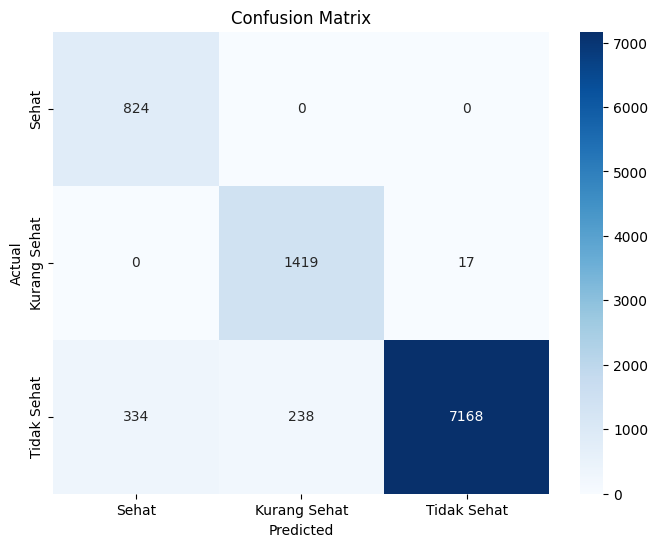

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to predicted class labels
y_pred_class = np.argmax(y_pred, axis=1)  # Convert the prediction results into the predicted class labels

# Display the classification report, which includes precision, recall, and F1-score for each class
print("Classification Report:")
print(classification_report(y_test, y_pred_class, target_names=['Sehat', 'Kurang Sehat', 'Tidak Sehat']))

# Display the confusion matrix, which shows the number of correct and incorrect predictions
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_class)
print(conf_matrix)

# Visualize the confusion matrix as a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sehat', 'Kurang Sehat', 'Tidak Sehat'], yticklabels=['Sehat', 'Kurang Sehat', 'Tidak Sehat'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Test the model with new input of features**

In [124]:
from tensorflow.keras.models import load_model
from tensorflow.nn import softmax

# Load the pre-trained model
model = load_model("categorizing_financial_health_model.h5")

# Initialize the LabelEncoder for 'location' and set its classes based on the training data
label_encoder_location = LabelEncoder()
label_encoder_location.classes_ = np.array(['ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DI YOGYAKARTA', 'DKI JAKARTA',
 'GORONTALO', 'JAMBI', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR',
 'KALIMANTAN BARAT', 'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH',
 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA', 'KEP. BANGKA BELITUNG', 'KEP. RIAU',
 'LAMPUNG', 'MALUKU', 'MALUKU UTARA', 'NUSA TENGGARA BARAT',
 'NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT', 'RIAU', 'SULAWESI BARAT',
 'SULAWESI SELATAN', 'SULAWESI TENGAH', 'SULAWESI TENGGARA', 'SULAWESI UTARA',
 'SUMATERA BARAT', 'SUMATERA SELATAN', 'SUMATERA UTARA'])  # Define actual classes from training data

# Initialize the LabelEncoder for 'financial_status' and set its classes based on the training data
label_encoder_financial_status = LabelEncoder()
label_encoder_financial_status.classes_ = np.array(["Kurang Sehat", "Sehat", "Tidak Sehat"])  # Define actual classes from training data

# Define the feature names for user input
feature_names = [
    "location", "age", "income", "food_expenses", "transport_expenses", "housing_cost",
    "water_bill", "electricity_bill", "internet_cost", "debt", "savings"
]

def get_user_input(feature_names):
    """
    Prompts the user to input values for each feature and returns them as a numpy array.
    The function handles both categorical (location and financial status) and numerical features.
    """
    user_data = []
    for feature in feature_names:
        if feature == 'location':  # For the 'location' column, use LabelEncoder
            value = input(f"Please enter the location ({', '.join(label_encoder_location.classes_)}): ")
            value = label_encoder_location.transform([value])[0]  # Convert the input into an encoded label
        elif feature == 'financial_status':  # For the 'financial_status' column, use LabelEncoder
            value = input(f"Please enter the financial status ({', '.join(label_encoder_financial_status.classes_)}): ")
            value = label_encoder_financial_status.transform([value])[0]  # Convert the input into an encoded label
        else:  # For all other features, take numeric input
            value = float(input(f"Please enter the value for {feature}: "))
        user_data.append(value)
    return np.array([user_data])  # Return as a numpy array for model input

def predict_financial_health(model, user_input):
    """
    Makes a prediction on the financial health based on user input.
    Converts logits to probabilities using softmax, and returns the predicted financial health category.
    """
    logits = model.predict(user_input)
    # Convert logits to probabilities using softmax
    probabilities = softmax(logits).numpy()
    # Get the class with the highest probability
    predicted_class = np.argmax(probabilities, axis=1)
    class_labels = ["Kurang Sehat", "Sehat", "Tidak Sehat"]
    return class_labels[predicted_class[0]]  # Return the predicted financial health label

# Get user input for each feature
user_input = get_user_input(feature_names)

# Make a prediction and display the result
predicted_health = predict_financial_health(model, user_input)
print(f"The predicted financial health is: {predicted_health}")


Please enter the location (ACEH, BALI, BANTEN, BENGKULU, DI YOGYAKARTA, DKI JAKARTA, GORONTALO, JAMBI, JAWA BARAT, JAWA TENGAH, JAWA TIMUR, KALIMANTAN BARAT, KALIMANTAN SELATAN, KALIMANTAN TENGAH, KALIMANTAN TIMUR, KALIMANTAN UTARA, KEP. BANGKA BELITUNG, KEP. RIAU, LAMPUNG, MALUKU, MALUKU UTARA, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, PAPUA, PAPUA BARAT, RIAU, SULAWESI BARAT, SULAWESI SELATAN, SULAWESI TENGAH, SULAWESI TENGGARA, SULAWESI UTARA, SUMATERA BARAT, SUMATERA SELATAN, SUMATERA UTARA): NUSA TENGGARA BARAT
Please enter the value for age: 27
Please enter the value for income: 2586423
Please enter the value for food_expenses: 795451
Please enter the value for transport_expenses: 141090
Please enter the value for housing_cost: 0
Please enter the value for water_bill: 50769
Please enter the value for electricity_bill: 421879
Please enter the value for internet_cost: 129321
Please enter the value for debt: 0
Please enter the value for savings: 1047912
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1